## Observations and Insights 

Three observations based on the data:
1. The data set was relatively clean; there was only one mouse with unacceptable data (g989) that was removed.
2. Looking at both the median and mean tumor size for each drug, as well as the box and whisker chart, it is clear that Remicade and Capomulin had the smallest tumor size and therefore are the most promising drugs.
3. There was a strong positive correlation of mouse weight vs. tumor size of the mice placed on the Capomulin regimen, based on the Pearsons correlation coefficient of 0.842. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# looking at the datasets, study results has quotes around everything

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset using pd.merge
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='left', on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mousecolumn = combined_mouse_df["Mouse ID"].unique()
len(mousecolumn)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# find rows where mouse ID and timepoint are the same as another row
# use .loc, .duplicated methods
duplicate_mouse_array = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# print the resulting array
print(duplicate_mouse_array)



['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989", :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_mouse_df[combined_mouse_df['Mouse ID']!='g989']
clean_mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
newmousecolumn = clean_mouse_df["Mouse ID"].unique()
len(newmousecolumn)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# use groupby Drug Regimen to eventually create DF with Drug Regimen as index, create series for each set of values
 
mean_series = clean_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_series = clean_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_series = clean_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev_series = clean_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM_series = clean_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# test each series as you go
# type(SEM_series)

# create the summary df using the above series, with Drug Regimen as the index
summary_table_df = pd.DataFrame({"Mean": mean_series,
                           "Median": median_series,
                           "Variance": variance_series,
                           "St. Dev.": stdev_series,
                           "SEM": SEM_series})

# show the df
summary_table_df


,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# use .agg function in a single groupby
summary_table2_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# This method produces everything in a single groupby function
summary_table2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

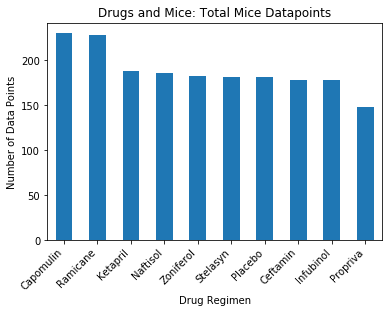

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# note this is not just the number of mice, but the total number of mice datapoints

# Get a count of number of mice datapoints for each drug
# use value_counts for the Drug Regimen column to add them up, and make this a new series
datapoints_series = clean_mouse_df['Drug Regimen'].value_counts()

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints_series.plot(kind="bar")

# Add labels, visuals
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Data Points")
plt.title("Drugs and Mice: Total Mice Datapoints")

# plot the chart
plt.show()


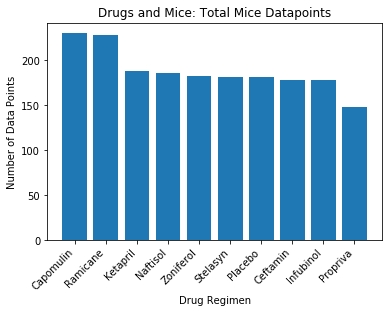

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# use the same data series as above
datapoints_series = clean_mouse_df['Drug Regimen'].value_counts()

# this time use plt.bar(datapoints_series.index and .values) to create the chart
# this gets the index.values (the drugs names) for x-axis, and .values (counts) for y-axis
plt.bar(datapoints_series.index.values,datapoints_series.values)

# as above add the visual elements
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Data Points")
plt.title("Drugs and Mice: Total Mice Datapoints")

# show the chart
plt.show()

# testing data
# type(datapoints_series)


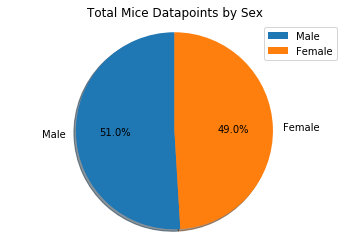

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# pandas df pie chart

# create a new series to plot based on value_counts by sex from the complete clean_mouse_df
gender_series = clean_mouse_df["Sex"].value_counts()

#create a df from that series
gender_df = pd.DataFrame(gender_series,columns=['Sex'])

# test the df
# gender_df

# use DataFrame.plot to create the pie chart, including angle, adding the percentage labels, shadow
gender_df.plot.pie(y='Sex', startangle=90, autopct='%1.1f%%', shadow = True)

# add visual elements
plt.title("Total Mice Datapoints by Sex")
plt.axis("equal")
plt.ylabel("")

# plot the chart
plt.show()

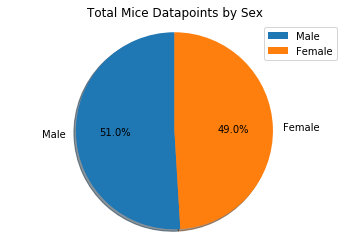

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# pyplot df pie chart
# create series for male vs. female called gender_series
# series = clean_mouse_df - "Sex" value counts

# define the data series
gender_series = clean_mouse_df["Sex"].value_counts()

#create a df from that series
gender_df = pd.DataFrame(gender_series,columns=['Sex'])

# use pyplot to create the pie chart
plt.pie(gender_df["Sex"], labels=gender_df.index, startangle=90, autopct="%1.1f%%", shadow=True)

# add visuals
plt.title("Total Mice Datapoints by Sex")
plt.axis("equal")
plt.ylabel("")
plt.legend()

# show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse in a new DF
# groupby Mouse ID and get max of Timepoint column; reset index so subsequent merge will have good index
last_timepoint_df = clean_mouse_df.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint_df = last_timepoint_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# do a left join into last timepoint from clean_mouse_df, on Mouse ID and Timepoint
# essentially adding the rest of the data for the last timepoints for each mouse
merged_df = last_timepoint_df.merge(clean_mouse_df,on=['Mouse ID','Timepoint'],how="left")
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting below)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# use a for loop for each drug
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # create variable for 2 column series to hold index and tumor volume values, , use .loc 
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset using append the previous variable to the list tumer_vol_list
    # this needs to be a list to pass on to plt.boxplot later
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #calculate the potential outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # print the potential outliers for each drug
    print(f"{drug}: potential outliers: {outliers}")

#check the final tumor_vol_list
#print(tumor_vol_list)

Capomulin: potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


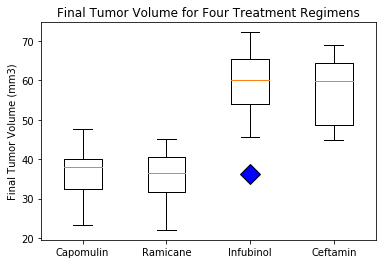

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# set different visuals for the outlier
outlier_visuals = dict(markerfacecolor='blue',markersize=14, marker = "D")

# create the box plot graph, with tumor_vol_list as data, drug_list as labels, outlier_visuals as outlier visuals
plt.boxplot(tumor_vol_list, labels = drug_list,flierprops=outlier_visuals)

# add additional visuals
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume for Four Treatment Regimens')

# show the graph
plt.show()

## Line and Scatter Plots

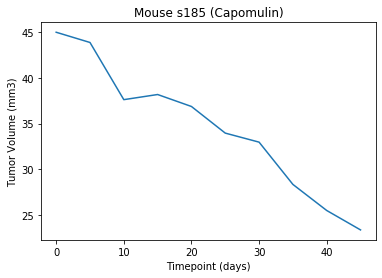

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# create df with just Capomulin data
capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == "Capomulin"]

# test to make sure dataframe works
# capomulin_df

# choose a mouse and get its data in a series
mousedata = capomulin_df.loc[capomulin_df['Mouse ID']== 's185']

# create line chart with plt.plot on timepoint, tumor volume
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])

# add visual elements
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse s185 (Capomulin)')

# show the chart
plt.show()



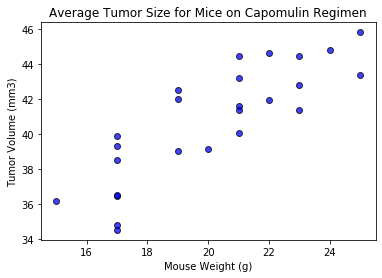

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Weight (g)	Tumor Volume (mm3)

# create a new df with just the averages from the capomulin df; use groupby mean
# groupby Mouse ID and then get the means of the data columns
capomulin_avg_df = capomulin_df.groupby(['Mouse ID']).mean()

# test the df
# capomulin_avg_df

# create the scatter, with weight avg as x-axis, Tumor vol avg as y-axis
# weight_series = capomulin_avg_df["Weight (g)"]
# tumor_series = capomulin_avg_df["Tumor Volume (mm3)"]
plt.scatter(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

# add visual elements
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Size for Mice on Capomulin Regimen')


#show the graph
plt.show()


## Correlation and Regression

In [19]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats import pearsonr
import numpy as np

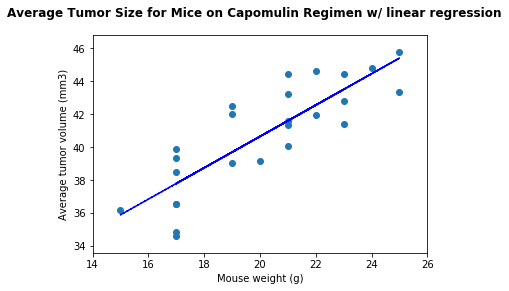

Pearsons correlation coefficient: 0.842


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# use scipy.stats.linregress; correlation coefficient will be between -1 and 1

# find the fit line: y = mx + b
x_axis = capomulin_avg_df["Weight (g)"]
y_values = capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Average Tumor Size for Mice on Capomulin Regimen w/ linear regression", fontsize=12, fontweight="bold")

ax.set_xlim(min(capomulin_avg_df["Weight (g)"])-1, max(capomulin_avg_df["Weight (g)"])+1)
ax.set_ylim(min(capomulin_avg_df["Tumor Volume (mm3)"])-1, max(capomulin_avg_df["Tumor Volume (mm3)"])+1)

ax.set_xlabel("Mouse weight (g)")
ax.set_ylabel("Average tumor volume (mm3)")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

# calculate Pearson's correlation
#data1 = capomulin_avg_df["Weight (g)"] data2 = capomulin_avg_df["Tumor Volume (mm3)"]
corr, _ = pearsonr(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])
print('Pearsons correlation coefficient: %.3f' % corr)